In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
optimization_config = {
    'eval_budget': 50
}
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

plt.rcParams.update({
     "text.usetex": True,
     "font.family": "sans-serif",
     "font.sans-serif": ["Helvetica"]
})

# for Palatino and other serif fonts use:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})

#COLORS = ['green','red', 'yellow', 'orange', 'blue', 'black']
#COLORS = [(0.0, 0.63, 0.53),(0.90,0.29,0.21), (0.87, 0.56, 0.27), (0.30, 0.73, 0.84), (0.39, 0.09, 0.47), (0.22, 0.31, 0.33)]
#COLORS = ['#008280FF', '#BB0021FF', '#808180FF', '#3B4992FF', '#631879FF', '#5F559BFF']
#HATCHES = ['', '', '', '','','']
from matplotlib import rcParams
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Times']
# LABELSIZE= 8 #8.97 * 0.67 #8 #5 #8.97*0.67
# WIDTH  = 8.43/2.54*0.9  # in inch
# HEIGHT = WIDTH / 1.618
# LINEWIDTH = 1.0 
from fig_hp import *
import matplotlib as mpl
mpl.use('pdf')
FONTDICT={'fontsize':LABELSIZE}

params = {
   'axes.labelsize': LABELSIZE,
   #'text.fontsize': LABELSIZE,
   'legend.fontsize': LABELSIZE,
   'xtick.labelsize': LABELSIZE,
   'ytick.labelsize': LABELSIZE,
   'text.usetex': False,
    'hatch.linewidth': 0.5,
   'figure.figsize': [WIDTH, HEIGHT]
   }
rcParams.update(params)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#jtplot.style()
from datetime import datetime

%load_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = np.load('test_GP_sample_result_with_pdbo_epbo.npz', allow_pickle=True)

In [3]:
def fix_first_ele(regret_list):
    num_traj, num_steps = regret_list.shape
    for k in range(num_traj):
        regret_list[k, 0] = np.array([[regret_list[k,0]]])
    return regret_list

safe_ave_cost_arr = data['arr_0'] 
safe_ave_simple_regret_arr = data['arr_1']
con_ave_cost_arr = data['arr_2']
con_ave_simple_regret_arr = data['arr_3']  
vabo_ave_cost_arr_set = data['arr_4']
vabo_ave_simple_regret_arr_set = data['arr_5']

safe_cost_lists = data['arr_6']
safe_simple_regret_lists = data['arr_7']
con_bo_cost_lists = data['arr_8']
con_bo_simple_regret_lists = data['arr_9'] 
vabo_cost_lists = data['arr_10']
vabo_simple_regret_lists = data['arr_11']

safe_regret_lists = fix_first_ele(data['arr_14'])
safe_constrs_lists = data['arr_15']
con_bo_regret_lists = fix_first_ele(data['arr_16'])

con_bo_constrs_lists = data['arr_17'] 
pdbo_regret_lists = fix_first_ele(data['arr_18']) 
pdbo_constrs_lists = data['arr_19']
vabo_regret_lists_set = data['arr_20']
vabo_constrs_lists_set = data['arr_21']

lcb2_regret_lists = fix_first_ele(data['arr_22'])
lcb2_constrs_lists = data['arr_23']

epbo_regret_lists_1 = fix_first_ele(data['arr_24'])
epbo_constrs_lists_1 = data['arr_25']

epbo_regret_lists_2 = fix_first_ele(data['arr_26'])
epbo_constrs_lists_2 = data['arr_27']

epbo_regret_lists_3 = fix_first_ele(data['arr_28'])
epbo_constrs_lists_3 = data['arr_29']





In [4]:
data['arr_24']

array([[0.09823068543899804, array([[1.60818205]]),
        array([[3.67524957]]), ..., array([[0.00151867]]),
        array([[0.00151867]]), array([[0.00151867]])],
       [2.8269589337184464, array([[3.06023596]]), array([[3.55284589]]),
        ..., array([[-0.10188832]]), array([[-0.10188832]]),
        array([[-0.10188832]])],
       [0.5789659504764584, array([[5.25005727]]), array([[2.72996715]]),
        ..., array([[-1.53843885]]), array([[-1.53843885]]),
        array([[-1.53843885]])],
       ...,
       [3.00456269061611, array([[2.81731203]]), array([[2.63266942]]),
        ..., array([[0.65756883]]), array([[0.65756883]]),
        array([[0.65756883]])],
       [0.058173451897219675, array([[2.39545691]]),
        array([[0.78445496]]), ..., array([[0.00650481]]),
        array([[0.00650481]]), array([[0.00650481]])],
       [0.7829917033206555, array([[1.60029299]]), array([[3.08574491]]),
        ..., array([[-0.01763073]]), array([[-0.01763073]]),
        array([[-0.01

In [5]:
# compare cost of different methods
EPSILON=1e-4
def plot_results():
    plt.figure()
    plt.plot(np.array(safe_bo_total_cost_list)[:,  0], marker='*')
    plt.plot(np.array(constrained_bo_total_cost_list)[:, 0], marker='o')
    legends_list = ['Safe BO', 'Generic Constrained BO']

    for violation_aware_bo_total_cost_list, budget in violation_aware_bo_total_cost_list_set:
        plt.plot(np.array(violation_aware_bo_total_cost_list)[:, 0], marker='+')
        legends_list.append('Violation Aware BO '+str(budget))
        #print(violation_aware_bo_total_cost_list)

    #plt.plot(np.array([vio_budget]*(optimization_config['eval_budget']+1)), marker='v', color='r')
    plt.xlim((0, optimization_config['eval_budget']+1))
    #plt.ylim((0, 500))
    print(legends_list)
    plt.legend(legends_list)
    plt.xlabel('Step')
    plt.ylabel('Cumulative cost')
    plt.savefig('./fig/cost_inc.png', format='png')
    # compare convergence
    plt.figure()
    plt.plot(safe_bo_best_obj_list, marker='*')
    plt.plot(constrained_bo_best_obj_list, marker='o')

    for violation_aware_bo_best_obj_list, budget in violation_aware_bo_best_obj_list_set:
        plt.plot(violation_aware_bo_best_obj_list, marker='+')

    plt.xlim((0, optimization_config['eval_budget']+1))
    #plt.ylim((0, 500))
    #plt.xlim((0, 20))
    plt.legend(legends_list)
    plt.xlabel('step')
    plt.ylabel('Simple Regret')
    plt.savefig('./fig/best_obj.png', format='png')


In [6]:
instance_id = 0

plt.plot(lcb2_regret_lists[instance_id, :])
plt.plot(lcb2_constrs_lists[instance_id, :])
plt.legend(['Regret', 'Constraint'])

In [7]:

_, total_steps = pdbo_regret_lists.shape
plt.figure()
plt.plot(np.cumsum(np.mean(np.squeeze(con_bo_regret_lists), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.squeeze(safe_regret_lists), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.squeeze(pdbo_regret_lists), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.squeeze(lcb2_regret_lists), axis=0))/np.arange(1, total_steps+1))
plt.xlabel('Steps')
plt.ylabel('Average Regret')
#plt.ylim((0, 0.4))
plt.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
plt.savefig('./fig/sample_SE_ave_regret.pdf', format='pdf')


plt.figure()
plt.plot(np.cumsum(np.mean(np.maximum(np.squeeze(con_bo_constrs_lists), 0), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.maximum(-np.squeeze(safe_constrs_lists), 0), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.maximum(np.squeeze(pdbo_constrs_lists), 0), axis=0))/np.arange(1, total_steps+1))
plt.plot(np.cumsum(np.mean(np.maximum(np.squeeze(lcb2_constrs_lists), 0), axis=0))/np.arange(1, total_steps+1))
plt.xlabel('Steps')
plt.ylabel('Average Violation')
plt.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
plt.savefig('./fig/sample_SE_ave_vio.pdf', format='pdf')



findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

In [8]:
pdbo_regret_lists.shape

(43, 101)

# draw cumulative regret

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

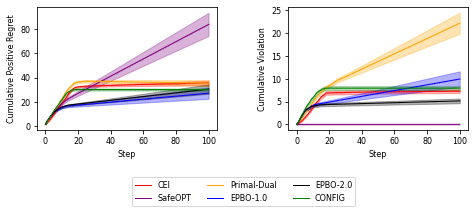

In [16]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','purple', 'orange', 'green', 'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
my_color = 'black' #'c'
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line, = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

def plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists,
                    epbo_regret_lists_1, epbo_constrs_lists_1, epbo_regret_lists_2, epbo_constrs_lists_2):
    num_traj, total_steps = pdbo_regret_lists.shape
    if False:
    #for i in range(num_traj):
        for j in range(total_steps):
            con_bo_regret_lists[i,j] = con_bo_regret_lists[i,j][0,0]
            safe_regret_lists[i,j] = safe_regret_lists[i,j][0,0]
            pdbo_regret_lists[i,j] = pdbo_regret_lists[i,j][0,0]
            lcb2_regret_lists[i,j] = lcb2_regret_lists[i,j][0,0]
            con_bo_constrs_lists[i,j] = con_bo_constrs_lists[i,j][0]
            safe_constrs_lists[i,j] = safe_constrs_lists[i,j][0]
            pdbo_constrs_lists[i,j] = pdbo_constrs_lists[i,j][0]
            lcb2_constrs_lists[i,j] = lcb2_constrs_lists[i,j][0]
    
    con_bo_regret_lists = con_bo_regret_lists.astype(float)
    safe_regret_lists = safe_regret_lists.astype(float)
    pdbo_regret_lists = pdbo_regret_lists.astype(float)
    lcb2_regret_lists = lcb2_regret_lists.astype(float)
    epbo_regret_lists_1 = epbo_regret_lists_1.astype(float)
    epbo_regret_lists_2 = epbo_regret_lists_2.astype(float)
    
    con_bo_constrs_lists = con_bo_constrs_lists.astype(float)
    safe_constrs_lists = safe_constrs_lists.astype(float)
    pdbo_constrs_lists = pdbo_constrs_lists.astype(float)
    lcb2_constrs_lists = lcb2_constrs_lists.astype(float)
    epbo_constrs_lists_1 = epbo_constrs_lists_1.astype(float)
    epbo_constrs_lists_2 = epbo_constrs_lists_2.astype(float)

    step_arr = np.arange(total_steps)
    con_bo_cumu_sum = np.cumsum(np.mean(np.squeeze(con_bo_regret_lists), axis=0))
    safe_bo_cumu_sum = np.cumsum(np.mean(np.squeeze(safe_regret_lists), axis=0))
    pdbo_cumu_sum = np.cumsum(np.mean(np.squeeze(pdbo_regret_lists), axis=0))
    lcb2_cumu_sum = np.cumsum(np.mean(np.squeeze(lcb2_regret_lists), axis=0))
    epbo_cumu_sum_1 = np.cumsum(np.mean(np.squeeze(np.maximum(epbo_regret_lists_1,0)), axis=0))
    epbo_cumu_sum_2 = np.cumsum(np.mean(np.squeeze(np.maximum(epbo_regret_lists_2,0)), axis=0))
    
    #print(con_bo_regret_lists)
    con_bo_cumu_sd = np.std(np.cumsum(np.squeeze(con_bo_regret_lists), axis=1), axis=0)
    safe_bo_cumu_sd = np.std(np.cumsum(np.squeeze(safe_regret_lists), axis=1), axis=0)
    pdbo_cumu_sd = np.std(np.cumsum(np.squeeze(pdbo_regret_lists), axis=1), axis=0)
    lcb2_cumu_sd = np.std(np.cumsum(np.squeeze(lcb2_regret_lists), axis=1), axis=0)
    epbo_cumu_sd_1 = np.std(np.cumsum(np.squeeze(epbo_regret_lists_1), axis=1), axis=0)
    epbo_cumu_sd_2 = np.std(np.cumsum(np.squeeze(epbo_regret_lists_2), axis=1), axis=0)

    
    con_bo_vio = np.cumsum(np.mean(np.maximum(np.squeeze(con_bo_constrs_lists), 0), axis=0))
    safe_bo_vio = np.cumsum(np.mean(np.maximum(-np.squeeze(safe_constrs_lists), 0), axis=0))
    pdbo_vio = np.cumsum(np.mean(np.maximum(np.squeeze(pdbo_constrs_lists), 0), axis=0))
    lcb2_vio = np.cumsum(np.mean(np.maximum(np.squeeze(lcb2_constrs_lists), 0), axis=0))
    epbo_vio_1 = np.cumsum(np.mean(np.maximum(np.squeeze(epbo_constrs_lists_1), 0), axis=0))
    epbo_vio_2 = np.cumsum(np.mean(np.maximum(np.squeeze(epbo_constrs_lists_2), 0), axis=0))

    
    con_bo_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(con_bo_constrs_lists),0), axis=1), axis=0)
    safe_bo_vio_sd = np.std(np.cumsum(np.maximum(-np.squeeze(safe_constrs_lists), 0), axis=1), axis=0)
    pdbo_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(pdbo_constrs_lists),0), axis=1), axis=0)
    lcb2_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(lcb2_constrs_lists),0), axis=1), axis=0)
    epbo_vio_sd_1 = np.std(np.cumsum(np.maximum(np.squeeze(epbo_constrs_lists_1),0), axis=1), axis=0)
    epbo_vio_sd_2 = np.std(np.cumsum(np.maximum(np.squeeze(epbo_constrs_lists_2),0), axis=1), axis=0)

    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(WIDTH * 2.6, HEIGHT * 1.2)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.33, wspace=0.4) 
   
    ax = axes[0]
    BETA1 = 0.1
    plot_with_shade_area(ax, step_arr, con_bo_cumu_sum, BETA1*con_bo_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, safe_bo_cumu_sum, BETA1*safe_bo_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, pdbo_cumu_sum, BETA1*pdbo_cumu_sd, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, epbo_cumu_sum_1, BETA1*epbo_cumu_sd_1,
                         linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, epbo_cumu_sum_2, BETA1*epbo_cumu_sd_2,
                         linewidth=LINEWIDTH, color=colors[5], marker=marksCur[5], markerfacecolor='None', markersize=MARKERSIZE)
    
    plot_with_shade_area(ax, step_arr, lcb2_cumu_sum, BETA1*lcb2_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
    
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.tick_params(axis='x', colors=my_color)
    ax.tick_params(axis='y', colors=my_color)
    ax.set_xlabel('Step', fontsize=LABELSIZE, color=my_color)
    ax.set_ylabel('Cumulative Positive Regret', fontsize=LABELSIZE, color=my_color)  
    #plt.xlim((0, 50))

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    ax = axes[1]

    #phi_line = ax.plot(con_bo_vio, linewidth=LINEWIDTH, color=colors[-1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    BETA2 = 0.1
    cei_line, cei_region = plot_with_shade_area(ax, step_arr, con_bo_vio, BETA2*con_bo_vio_sd, 
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None')
    safe_line, safe_region = plot_with_shade_area(ax, step_arr, safe_bo_vio, BETA2*safe_bo_vio_sd,
                        linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None')
    pdbo_line, pdbo_region = plot_with_shade_area(ax, step_arr, pdbo_vio, BETA2*pdbo_vio_sd,
                        linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None')
    epbo1_line, epbo1_region = plot_with_shade_area(ax, step_arr, epbo_vio_1, BETA2*epbo_vio_sd_1,
                        linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None')
    epbo2_line, epbo2_region = plot_with_shade_area(ax, step_arr, epbo_vio_2, BETA2*epbo_vio_sd_2,
                        linewidth=LINEWIDTH, color=colors[5], marker=marksCur[5], markerfacecolor='None')
    lcb2_line, lcb2_region = plot_with_shade_area(ax, step_arr, lcb2_vio, BETA2*lcb2_vio_sd,
                        linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None')
    
    #plt.xlim((0, 100))
    ax.legend([cei_line, safe_line, pdbo_line, epbo1_line, epbo2_line, lcb2_line], ['CEI', 'SafeOPT', 'Primal-Dual', 'EPBO-1.0', 'EPBO-2.0', 'CONFIG'], loc='lower center', bbox_to_anchor=(-0.5, -0.65, 0.5, 0.5),
             ncol=3)

    plt.xticks(fontsize=LABELSIZE, color=my_color)
    plt.yticks(fontsize=LABELSIZE, color=my_color)
    ax.set_xlabel('Step', fontsize=LABELSIZE, color=my_color)
    ax.set_ylabel('Cumulative Violation', fontsize=LABELSIZE, color=my_color)
    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})


    #plt.savefig('./fig/ave_adv_comp.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(f'./fig/sample_funcs_r_and_v_red_region.png', format='png', bbox_inches='tight', dpi=500)
    plt.show()  
    
plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists,
                epbo_regret_lists_2, epbo_constrs_lists_2, epbo_regret_lists_3, epbo_constrs_lists_3)


findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following 

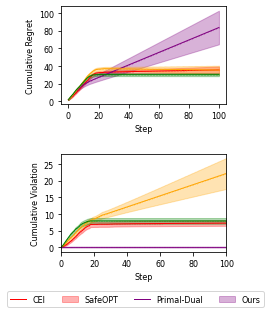

In [17]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','purple', 'orange', 'green', 'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

def plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
    if False:
    #for i in range(num_traj):
        for j in range(total_steps):
            con_bo_regret_lists[i,j] = con_bo_regret_lists[i,j][0,0]
            safe_regret_lists[i,j] = safe_regret_lists[i,j][0,0]
            pdbo_regret_lists[i,j] = pdbo_regret_lists[i,j][0,0]
            lcb2_regret_lists[i,j] = lcb2_regret_lists[i,j][0,0]
            con_bo_constrs_lists[i,j] = con_bo_constrs_lists[i,j][0]
            safe_constrs_lists[i,j] = safe_constrs_lists[i,j][0]
            pdbo_constrs_lists[i,j] = pdbo_constrs_lists[i,j][0]
            lcb2_constrs_lists[i,j] = lcb2_constrs_lists[i,j][0]
    
    con_bo_regret_lists = con_bo_regret_lists.astype(float)
    safe_regret_lists = safe_regret_lists.astype(float)
    pdbo_regret_lists = pdbo_regret_lists.astype(float)
    lcb2_regret_lists = lcb2_regret_lists.astype(float)
    con_bo_constrs_lists = con_bo_constrs_lists.astype(float)
    safe_constrs_lists = safe_constrs_lists.astype(float)
    pdbo_constrs_lists = pdbo_constrs_lists.astype(float)
    lcb2_constrs_lists = lcb2_constrs_lists.astype(float)
    step_arr = np.arange(total_steps)
    con_bo_cumu_sum = np.cumsum(np.mean(np.squeeze(con_bo_regret_lists), axis=0))
    safe_bo_cumu_sum = np.cumsum(np.mean(np.squeeze(safe_regret_lists), axis=0))
    pdbo_cumu_sum = np.cumsum(np.mean(np.squeeze(pdbo_regret_lists), axis=0))
    lcb2_cumu_sum = np.cumsum(np.mean(np.squeeze(lcb2_regret_lists), axis=0))
    #print(con_bo_regret_lists)
    con_bo_cumu_sd = np.std(np.cumsum(np.squeeze(con_bo_regret_lists), axis=1), axis=0)
    safe_bo_cumu_sd = np.std(np.cumsum(np.squeeze(safe_regret_lists), axis=1), axis=0)
    pdbo_cumu_sd = np.std(np.cumsum(np.squeeze(pdbo_regret_lists), axis=1), axis=0)
    lcb2_cumu_sd = np.std(np.cumsum(np.squeeze(lcb2_regret_lists), axis=1), axis=0)
    
    con_bo_vio = np.cumsum(np.mean(np.maximum(np.squeeze(con_bo_constrs_lists), 0), axis=0))
    safe_bo_vio = np.cumsum(np.mean(np.maximum(-np.squeeze(safe_constrs_lists), 0), axis=0))
    pdbo_vio = np.cumsum(np.mean(np.maximum(np.squeeze(pdbo_constrs_lists), 0), axis=0))
    lcb2_vio = np.cumsum(np.mean(np.maximum(np.squeeze(lcb2_constrs_lists), 0), axis=0))
    
    con_bo_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(con_bo_constrs_lists),0), axis=1), axis=0)
    safe_bo_vio_sd = np.std(np.cumsum(np.maximum(-np.squeeze(safe_constrs_lists), 0), axis=1), axis=0)
    pdbo_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(pdbo_constrs_lists),0), axis=1), axis=0)
    lcb2_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(lcb2_constrs_lists),0), axis=1), axis=0)
    
    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(2, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 2.4)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes[0]
    BETA1 = 0.2
    plot_with_shade_area(ax, step_arr, con_bo_cumu_sum, BETA1*con_bo_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, safe_bo_cumu_sum, BETA1*safe_bo_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, pdbo_cumu_sum, BETA1*pdbo_cumu_sd, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, lcb2_cumu_sum, BETA1*lcb2_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
    plt.xlim((0, 50))
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Cumulative Regret', fontsize=LABELSIZE)  

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    ax = axes[1]

    #phi_line = ax.plot(con_bo_vio, linewidth=LINEWIDTH, color=colors[-1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    BETA2 = 0.2
    plot_with_shade_area(ax, step_arr, con_bo_vio, BETA2*con_bo_vio_sd, 
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, safe_bo_vio, BETA2*safe_bo_vio_sd,
                        linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, pdbo_vio, BETA2*pdbo_vio_sd,
                        linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, lcb2_vio, BETA2*lcb2_vio_sd,
                        linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None')
    
    plt.xlim((0, 100))
    ax.legend(['CEI', 'SafeOPT', 'Primal-Dual', 'Ours'], loc='lower center', bbox_to_anchor=(0.2, -0.6, 0.5, 0.5),
             ncol=4)

    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Cumulative Violation', fontsize=LABELSIZE)
    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})


    #plt.savefig('./fig/ave_adv_comp.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(f'./fig/sample_funcs_r_and_v.pdf', format='pdf', bbox_inches='tight')
    plt.show()  
    
plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists)


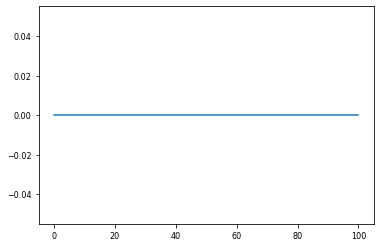

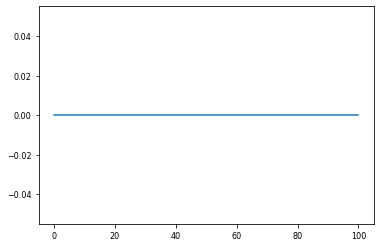

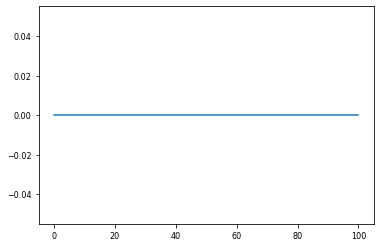

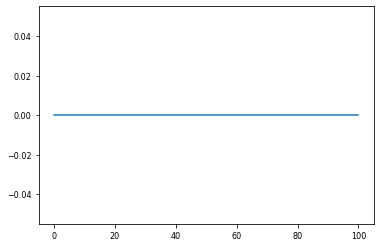

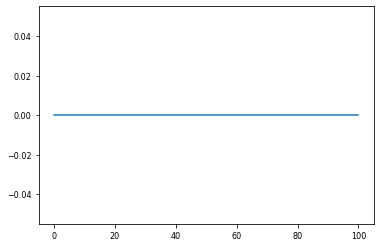

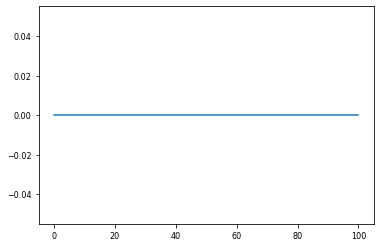

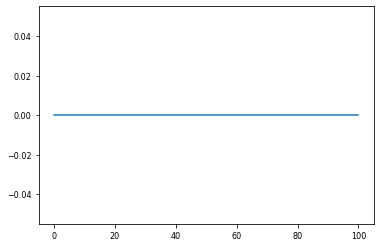

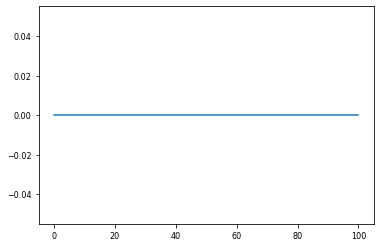

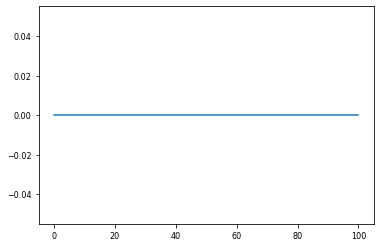

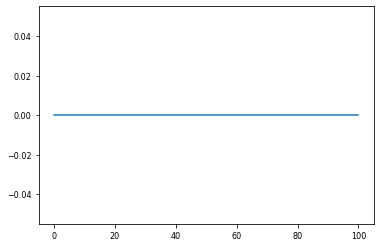

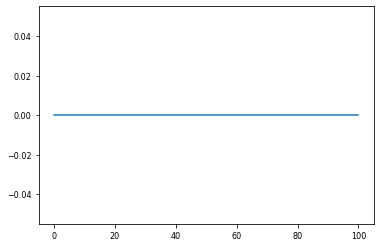

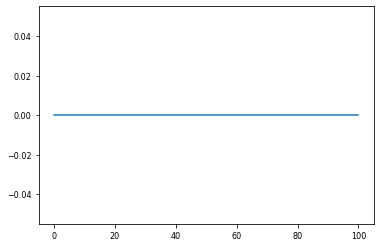

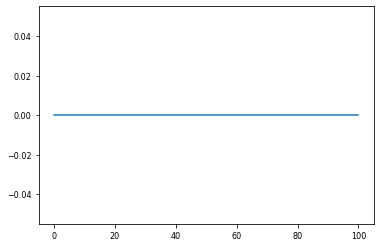

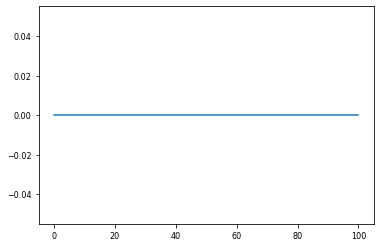

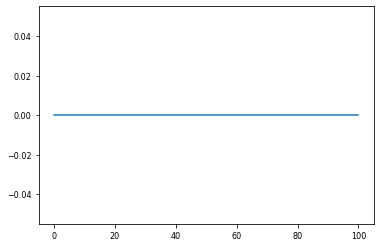

In [28]:
num_traj, num_constr, _ = safe_constrs_lists.shape
for k in range(num_traj):
    plt.figure()
    plt.plot(np.maximum(-safe_constrs_lists[k, :, 0],0.0))

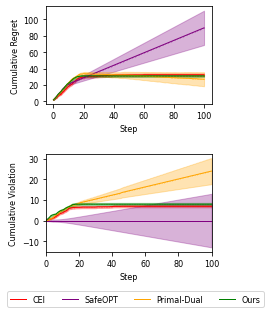

In [16]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','purple', 'orange', 'green', 'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

def plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
    if False:
    #for i in range(num_traj):
        for j in range(total_steps):
            con_bo_regret_lists[i,j] = con_bo_regret_lists[i,j][0,0]
            safe_regret_lists[i,j] = safe_regret_lists[i,j][0,0]
            pdbo_regret_lists[i,j] = pdbo_regret_lists[i,j][0,0]
            lcb2_regret_lists[i,j] = lcb2_regret_lists[i,j][0,0]
            con_bo_constrs_lists[i,j] = con_bo_constrs_lists[i,j][0]
            safe_constrs_lists[i,j] = safe_constrs_lists[i,j][0]
            pdbo_constrs_lists[i,j] = pdbo_constrs_lists[i,j][0]
            lcb2_constrs_lists[i,j] = lcb2_constrs_lists[i,j][0]
    
    con_bo_regret_lists = con_bo_regret_lists.astype(float)
    safe_regret_lists = safe_regret_lists.astype(float)
    pdbo_regret_lists = pdbo_regret_lists.astype(float)
    lcb2_regret_lists = lcb2_regret_lists.astype(float)
    con_bo_constrs_lists = con_bo_constrs_lists.astype(float)
    safe_constrs_lists = safe_constrs_lists.astype(float)
    pdbo_constrs_lists = pdbo_constrs_lists.astype(float)
    lcb2_constrs_lists = lcb2_constrs_lists.astype(float)
    step_arr = np.arange(total_steps)
    con_bo_cumu_sum = np.cumsum(np.mean(np.squeeze(con_bo_regret_lists), axis=0))
    safe_bo_cumu_sum = np.cumsum(np.mean(np.squeeze(safe_regret_lists), axis=0))
    pdbo_cumu_sum = np.cumsum(np.mean(np.squeeze(pdbo_regret_lists), axis=0))
    lcb2_cumu_sum = np.cumsum(np.mean(np.squeeze(lcb2_regret_lists), axis=0))
    #print(con_bo_regret_lists)
    con_bo_cumu_sd = np.std(np.cumsum(np.squeeze(con_bo_regret_lists), axis=1), axis=0)
    safe_bo_cumu_sd = np.std(np.cumsum(np.squeeze(safe_regret_lists), axis=1), axis=0)
    pdbo_cumu_sd = np.std(np.cumsum(np.squeeze(pdbo_regret_lists), axis=1), axis=0)
    lcb2_cumu_sd = np.std(np.cumsum(np.squeeze(lcb2_regret_lists), axis=1), axis=0)
    
    con_bo_vio = np.cumsum(np.mean(np.maximum(np.squeeze(con_bo_constrs_lists), 0), axis=0))
    safe_bo_vio = np.cumsum(np.mean(np.maximum(-np.squeeze(safe_constrs_lists), 0), axis=0))
    pdbo_vio = np.cumsum(np.mean(np.maximum(np.squeeze(pdbo_constrs_lists), 0), axis=0))
    lcb2_vio = np.cumsum(np.mean(np.maximum(np.squeeze(lcb2_constrs_lists), 0), axis=0))
    
    con_bo_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(con_bo_constrs_lists),0), axis=1), axis=0)
    safe_bo_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(safe_constrs_lists), 0), axis=1), axis=0)
    pdbo_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(pdbo_constrs_lists),0), axis=1), axis=0)
    lcb2_vio_sd = np.std(np.cumsum(np.maximum(np.squeeze(lcb2_constrs_lists),0), axis=1), axis=0)
    
    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(2, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 2.4)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes[0]
    BETA1 = 0.2
    plot_with_shade_area(ax, step_arr, con_bo_cumu_sum, BETA1*con_bo_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, safe_bo_cumu_sum, BETA1*safe_bo_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, pdbo_cumu_sum, BETA1*pdbo_cumu_sd, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, lcb2_cumu_sum, BETA1*lcb2_cumu_sd,
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
    plt.xlim((0, 50))
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Cumulative Regret', fontsize=LABELSIZE)  

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    ax = axes[1]

    #phi_line = ax.plot(con_bo_vio, linewidth=LINEWIDTH, color=colors[-1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    BETA2 = 0.2
    plot_with_shade_area(ax, step_arr, con_bo_vio, BETA2*con_bo_vio_sd, 
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, safe_bo_vio, BETA2*safe_bo_vio_sd,
                        linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, pdbo_vio, BETA2*pdbo_vio_sd,
                        linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None')
    plot_with_shade_area(ax, step_arr, lcb2_vio, BETA2*lcb2_vio_sd,
                        linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None')
    
    plt.xlim((0, 100))
    ax.legend(['CEI', 'SafeOPT', 'Primal-Dual', 'Ours'], loc='lower center', bbox_to_anchor=(0.29, -0.6, 0.5, 0.5),
             ncol=4)

    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Cumulative Violation', fontsize=LABELSIZE)
    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})


    #plt.savefig('./fig/ave_adv_comp.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(f'./fig/sample_funcs_r_and_v.pdf', format='pdf', bbox_inches='tight')
    plt.show()  
    
plot_cumu_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists)


# draw approximately feasible optimal solution

findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following 

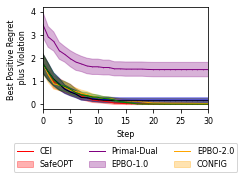

In [32]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','purple', 'orange', 'green',  'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

def plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists, 
                    epbo_1_regret_lists, epbo_1_constrs_lists, epbo_2_regret_lists, epbo_2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
    if False:
    #for i in range(num_traj):
        for j in range(total_steps):
            con_bo_regret_lists[i,j] = con_bo_regret_lists[i,j][0,0]
            safe_regret_lists[i,j] = safe_regret_lists[i,j][0,0]
            pdbo_regret_lists[i,j] = pdbo_regret_lists[i,j][0,0]
            lcb2_regret_lists[i,j] = lcb2_regret_lists[i,j][0,0]
            con_bo_constrs_lists[i,j] = con_bo_constrs_lists[i,j][0]
            safe_constrs_lists[i,j] = safe_constrs_lists[i,j][0]
            pdbo_constrs_lists[i,j] = pdbo_constrs_lists[i,j][0]
            lcb2_constrs_lists[i,j] = lcb2_constrs_lists[i,j][0]
    
    con_bo_regret_lists = con_bo_regret_lists.astype(float)
    safe_regret_lists = safe_regret_lists.astype(float)
    pdbo_regret_lists = pdbo_regret_lists.astype(float)
    lcb2_regret_lists = lcb2_regret_lists.astype(float)
    epbo_1_regret_lists = epbo_1_regret_lists.astype(float)
    epbo_2_regret_lists = epbo_2_regret_lists.astype(float)
    
    con_bo_constrs_lists = con_bo_constrs_lists.astype(float)
    safe_constrs_lists = safe_constrs_lists.astype(float)
    pdbo_constrs_lists = pdbo_constrs_lists.astype(float)
    lcb2_constrs_lists = lcb2_constrs_lists.astype(float)
    epbo_1_constrs_lists = epbo_1_constrs_lists.astype(float)
    epbo_2_constrs_lists = epbo_2_constrs_lists.astype(float)
    
    step_arr = np.arange(total_steps)
    
    con_bo_best_regret_constr_lists = np.minimum.accumulate(np.maximum(con_bo_regret_lists, 0) + np.maximum(np.squeeze(con_bo_constrs_lists), 0), axis=1)
    safe_best_regret_constr_lists = np.minimum.accumulate(np.maximum(safe_regret_lists, 0) + np.maximum(np.squeeze(safe_constrs_lists), 0), axis=1)
    pdbo_best_regret_constr_lists = np.minimum.accumulate(np.maximum(pdbo_regret_lists, 0) + np.maximum(np.squeeze(pdbo_constrs_lists), 0), axis=1)
    lcb2_best_regret_constr_lists = np.minimum.accumulate(np.maximum(lcb2_regret_lists, 0) + np.maximum(np.squeeze(lcb2_constrs_lists), 0), axis=1)
    epbo_1_best_regret_constr_lists = np.minimum.accumulate(np.maximum(epbo_1_regret_lists, 0) + np.maximum(np.squeeze(epbo_1_constrs_lists), 0), axis=1)
    epbo_2_best_regret_constr_lists = np.minimum.accumulate(np.maximum(epbo_2_regret_lists, 0) + np.maximum(np.squeeze(epbo_2_constrs_lists), 0), axis=1)

    con_bo_best_regret_constr_lists_mean = np.mean(con_bo_best_regret_constr_lists, axis=0)
    safe_best_regret_constr_lists_mean = np.mean(safe_best_regret_constr_lists, axis=0)
    pdbo_best_regret_constr_lists_mean = np.mean(pdbo_best_regret_constr_lists, axis=0)
    lcb2_best_regret_constr_lists_mean = np.mean(lcb2_best_regret_constr_lists, axis=0)
    epbo_1_best_regret_constr_lists_mean = np.mean(epbo_1_best_regret_constr_lists, axis=0)
    epbo_2_best_regret_constr_lists_mean = np.mean(epbo_2_best_regret_constr_lists, axis=0)

        
    con_bo_best_regret_constr_lists_sd = np.std(con_bo_best_regret_constr_lists, axis=0)
    safe_best_regret_constr_lists_sd = np.std(safe_best_regret_constr_lists, axis=0)
    pdbo_best_regret_constr_lists_sd = np.std(pdbo_best_regret_constr_lists, axis=0)
    lcb2_best_regret_constr_lists_sd = np.std(lcb2_best_regret_constr_lists, axis=0)
        
    epbo_1_best_regret_constr_lists_sd = np.std(epbo_1_best_regret_constr_lists, axis=0)
    epbo_2_best_regret_constr_lists_sd = np.std(epbo_2_best_regret_constr_lists, axis=0)

    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 1.0)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes #[0]
    BETA1 = 0.3
    plot_with_shade_area(ax, step_arr, con_bo_best_regret_constr_lists_mean, BETA1*con_bo_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, safe_best_regret_constr_lists_mean, BETA1*safe_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, pdbo_best_regret_constr_lists_mean, BETA1*pdbo_best_regret_constr_lists_sd, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, epbo_1_best_regret_constr_lists_mean, BETA1*epbo_1_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, epbo_2_best_regret_constr_lists_mean, BETA1*epbo_2_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[5], marker=marksCur[5], markerfacecolor='None', markersize=MARKERSIZE)
    plot_with_shade_area(ax, step_arr, lcb2_best_regret_constr_lists_mean, BETA1*lcb2_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
    plt.xlim((0, 30))
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('Best Positive Regret \n plus Violation', fontsize=LABELSIZE)  

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    
   
    ax.legend(['CEI', 'SafeOPT', 'Primal-Dual', 'EPBO-1.0', 'EPBO-2.0', 'CONFIG'], loc='lower center', bbox_to_anchor=(0.25, -0.65, 0.5, 0.5),
             ncol=3)

    
    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})


    #plt.savefig('./fig/ave_adv_comp.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(f'./fig/sample_funcs_r_p_v.pdf', format='pdf', bbox_inches='tight')
    plt.show()  
    
plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists,
                 epbo_regret_lists_2, epbo_constrs_lists_2, epbo_regret_lists_3, epbo_constrs_lists_3)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

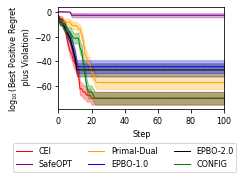

In [22]:
MARKERSIZE = 1.5 * 0.4 * 0.1
colors = ['red','purple', 'orange', 'green',  'blue', 'black', 'blue']
marksCur = ['o','s', '*', 'v', '^','+']
def plot_with_shade_area(ax, x, y, yerr, **kwargs):
    aver_line, = ax.plot(x, y,markersize=MARKERSIZE, linewidth=LINEWIDTH, color=kwargs['color'], marker=kwargs['marker'], markerfacecolor='None')
    aver_region = ax.fill_between(x, y-yerr, y+yerr, alpha=0.3,color=kwargs['color'])
    return aver_line, aver_region

def plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists, 
                    epbo_1_regret_lists, epbo_1_constrs_lists, epbo_2_regret_lists, epbo_2_constrs_lists):
    num_traj, total_steps = pdbo_regret_lists.shape
    if False:
    #for i in range(num_traj):
        for j in range(total_steps):
            con_bo_regret_lists[i,j] = con_bo_regret_lists[i,j][0,0]
            safe_regret_lists[i,j] = safe_regret_lists[i,j][0,0]
            pdbo_regret_lists[i,j] = pdbo_regret_lists[i,j][0,0]
            lcb2_regret_lists[i,j] = lcb2_regret_lists[i,j][0,0]
            con_bo_constrs_lists[i,j] = con_bo_constrs_lists[i,j][0]
            safe_constrs_lists[i,j] = safe_constrs_lists[i,j][0]
            pdbo_constrs_lists[i,j] = pdbo_constrs_lists[i,j][0]
            lcb2_constrs_lists[i,j] = lcb2_constrs_lists[i,j][0]
    
    con_bo_regret_lists = con_bo_regret_lists.astype(float)
    safe_regret_lists = safe_regret_lists.astype(float)
    pdbo_regret_lists = pdbo_regret_lists.astype(float)
    lcb2_regret_lists = lcb2_regret_lists.astype(float)
    epbo_1_regret_lists = epbo_1_regret_lists.astype(float)
    epbo_2_regret_lists = epbo_2_regret_lists.astype(float)
    
    con_bo_constrs_lists = con_bo_constrs_lists.astype(float)
    safe_constrs_lists = safe_constrs_lists.astype(float)
    pdbo_constrs_lists = pdbo_constrs_lists.astype(float)
    lcb2_constrs_lists = lcb2_constrs_lists.astype(float)
    epbo_1_constrs_lists = epbo_1_constrs_lists.astype(float)
    epbo_2_constrs_lists = epbo_2_constrs_lists.astype(float)
    
    step_arr = np.arange(total_steps)
    eps = 1e-110
    con_bo_best_regret_constr_lists = np.log10(np.maximum(np.minimum.accumulate(np.maximum(con_bo_regret_lists, 0) + np.maximum(np.squeeze(con_bo_constrs_lists), 0), axis=1), eps))
    safe_best_regret_constr_lists = np.log10(np.maximum(np.minimum.accumulate(np.maximum(safe_regret_lists, 0) + np.maximum(np.squeeze(safe_constrs_lists), 0), axis=1), eps))
    pdbo_best_regret_constr_lists = np.log10(np.maximum(np.minimum.accumulate(np.maximum(pdbo_regret_lists, 0) + np.maximum(np.squeeze(pdbo_constrs_lists), 0), axis=1), eps))
    lcb2_best_regret_constr_lists = np.log10(np.maximum(np.minimum.accumulate(np.maximum(lcb2_regret_lists, 0) + np.maximum(np.squeeze(lcb2_constrs_lists), 0), axis=1), eps))
    epbo_1_best_regret_constr_lists = np.log10(np.maximum(np.minimum.accumulate(np.maximum(epbo_1_regret_lists, 0) + np.maximum(np.squeeze(epbo_1_constrs_lists), 0), axis=1), eps))
    epbo_2_best_regret_constr_lists = np.log10(np.maximum(np.minimum.accumulate(np.maximum(epbo_2_regret_lists, 0) + np.maximum(np.squeeze(epbo_2_constrs_lists), 0), axis=1), eps))

    con_bo_best_regret_constr_lists_mean = np.mean(con_bo_best_regret_constr_lists, axis=0)
    safe_best_regret_constr_lists_mean = np.mean(safe_best_regret_constr_lists, axis=0)
    pdbo_best_regret_constr_lists_mean = np.mean(pdbo_best_regret_constr_lists, axis=0)
    lcb2_best_regret_constr_lists_mean = np.mean(lcb2_best_regret_constr_lists, axis=0)
    epbo_1_best_regret_constr_lists_mean = np.mean(epbo_1_best_regret_constr_lists, axis=0)
    epbo_2_best_regret_constr_lists_mean = np.mean(epbo_2_best_regret_constr_lists, axis=0)

    con_bo_best_regret_constr_lists_sd = np.std(con_bo_best_regret_constr_lists, axis=0)
    safe_best_regret_constr_lists_sd = np.std(safe_best_regret_constr_lists, axis=0)
    pdbo_best_regret_constr_lists_sd = np.std(pdbo_best_regret_constr_lists, axis=0)
    lcb2_best_regret_constr_lists_sd = np.std(lcb2_best_regret_constr_lists, axis=0)
        
    epbo_1_best_regret_constr_lists_sd = np.std(epbo_1_best_regret_constr_lists, axis=0)
    epbo_2_best_regret_constr_lists_sd = np.std(epbo_2_best_regret_constr_lists, axis=0)

    %matplotlib inline
    #from matplotlib import rc
    #plt.rc('text',usetex=False)
   

    
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(WIDTH * 1.0, HEIGHT * 1.0)

    fig.subplots_adjust(left=.22, bottom=.20, right=.99, top=.97, hspace=0.5, wspace=0.4) 
   
    ax = axes #[0]
    BETA1 = 0.1
    cei_line, cei_region = plot_with_shade_area(ax, step_arr, con_bo_best_regret_constr_lists_mean, BETA1*con_bo_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[0], marker=marksCur[0], markerfacecolor='None', markersize=MARKERSIZE)
    safe_line, safe_region = plot_with_shade_area(ax, step_arr, safe_best_regret_constr_lists_mean, BETA1*safe_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[1], marker=marksCur[1], markerfacecolor='None', markersize=MARKERSIZE)
    pdbo_line, pdbo_region = plot_with_shade_area(ax, step_arr, pdbo_best_regret_constr_lists_mean, BETA1*pdbo_best_regret_constr_lists_sd, 
                         linewidth=LINEWIDTH, color=colors[2], marker=marksCur[2], markerfacecolor='None', markersize=MARKERSIZE)
    epbo1_line, epbo1_region = plot_with_shade_area(ax, step_arr, epbo_1_best_regret_constr_lists_mean, BETA1*epbo_1_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[4], marker=marksCur[4], markerfacecolor='None', markersize=MARKERSIZE)
    epbo2_line, epbo2_region = plot_with_shade_area(ax, step_arr, epbo_2_best_regret_constr_lists_mean, BETA1*epbo_2_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[5], marker=marksCur[5], markerfacecolor='None', markersize=MARKERSIZE)
    lcb2_line, lcb2_region = plot_with_shade_area(ax, step_arr, lcb2_best_regret_constr_lists_mean, BETA1*lcb2_best_regret_constr_lists_sd,
                         linewidth=LINEWIDTH, color=colors[3], marker=marksCur[3], markerfacecolor='None', markersize=MARKERSIZE)
    
    plt.xlim((0, 100))
    plt.xticks(fontsize=LABELSIZE)
    plt.yticks(fontsize=LABELSIZE)
    ax.set_xlabel('Step', fontsize=LABELSIZE)
    ax.set_ylabel('$\log_{10}$(Best Positive Regret \n plus Violation)', fontsize=LABELSIZE)  

    #ax.legend(['CEI', 'Safe BO', 'Primal-Dual', 'LCB2'])
    
    
   
    ax.legend([cei_line, safe_line, pdbo_line, epbo1_line, epbo2_line, lcb2_line], ['CEI', 'SafeOPT', 'Primal-Dual', 'EPBO-1.0', 'EPBO-2.0', 'CONFIG'], loc='lower center', bbox_to_anchor=(0.15, -0.65, 0.5, 0.5),
             ncol=3)

    
    #ax.set_xscale('log')
    #ax.set_title('The Second Contextual Variable', fontsize=LABELSIZE)
    #ax.set_ylim(0, 0.2)
    #lgd = plt.legend(['', ''], loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, prop={'size': LABELSIZE})
    #fig.set_size_inches(WIDTH, HEIGHT)

    #lgd = fig.legend((aver_line[0], adv_line[0]), ('Average', 'Adversarial'), 
    #                 loc='upper right', bbox_to_anchor=(0.78, 0.1), ncol=3, prop={'size': LABELSIZE})


    #plt.savefig('./fig/ave_adv_comp.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(f'./fig/sample_funcs_r_p_v_log.png', format='png', bbox_inches='tight', dpi=500)
    plt.show()  
    
plot_best_result(con_bo_regret_lists, safe_regret_lists, pdbo_regret_lists, lcb2_regret_lists,
                    con_bo_constrs_lists, safe_constrs_lists, pdbo_constrs_lists, lcb2_constrs_lists,
                 epbo_regret_lists_2, epbo_constrs_lists_2, epbo_regret_lists_3, epbo_constrs_lists_3)


In [21]:
print(np.array(epbo_regret_lists_1).shape)


(43, 101)
